In [1]:
!pip install --upgrade pip
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## generate all data needed ## 
unemployment = pd.read_csv('clean_unemployment.csv')
ds_salaries = pd.read_csv('ds_salaries_clean.csv')
books = pd.read_csv('clean_books.csv')
divorce = pd.read_csv('divorce.csv')
planes = pd.read_csv('planes.csv')

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


/Users/tiatitisari/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Intial Exploration 
- Exploratory Data Analysis = EDA
  - derive insights
  - generate hypotheses
  - how?
    1. initial look : .head()
    2. gathering more : .info()
    3. categorical value count : .value_counts()
    4. numerical columns info : .describe()
  - validating data types
    1. .dtypes
    2. change data types using .astype
    3. str, int, float, dict, list, bool
  - validating categorical data
    1. .isin
    2. ~ >> tilde work as not
  - validating numerical data
    1. .select_dtypes("number").
    2. .min(), .max()
  - Data summarization
    1. .groupby()
    2. aggregating function indicates how to summarize grouped data : .sum(), .min(), .max(), .var(), .std() , .count()
    3. .agg([]) >> you can use dictionary here:
       - agg({'rating':["mean","std"], "year":["median"]})
       - you can named summary columns
         - books.groupby('genre').agg(mean_rating=('rating','mean'),std_rating=('rating','std'))
  - Visualizing categorical data
    1. sns.barplot()
   
# Addressing missing data 
- why a problem?
  1. Affects distributions
  2. Less representative of the population
  3. Can result in drawing incorrect conclusions
      - salaries.isna().sum()
- strategies for addressing missing data
  1. drop missing values - 5% or less of total values
     - threshold = len(salaries) *0.05 >> limit 30
     - cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
     - salaries.dropna(subset= cols_to_drop,inplace = True)
  3. input mean, median, mode - depens on distribution and context
     - cols_with_missing_values = salaries.columns[salaries.isna().sum() > 0]
     - for i in cols_with_missing_values:
          - salaries[col].fillna(salaries[col].mode()[0])
  5. input by sub-group - e.g different salary based on position
     - salaries_dict = salaries.groupby('Experience')['salary'].median().to_dict()
     - salaries['salary']=salaries['salary'].fillna(salaries['experience'.map(salaries_dict))

# Converting and Analyzing Categorical Data 
- .select_dtypes('number'/'object') >> depend which data you want to check
- .nunique() >> to check unique number for each category,, the number not the value if you wanna check the value you need to use .unique() 
- Extracting value from categories
  1. pandas.Series.str.contains() >> search a column for a specific string or multiple strings 
  2. multiple phrases in strings you can use "|"
     - e.g "Machine Learning" or "AI": salaries['Designation'].str.contains("Machine Learning|AI")
     - any word start with data then salaries['Designation'].str.contains("^Data")
     - jiajfeioarwiajroi
       

In [2]:
# Print the first five rows of unemployment
print(unemployment.head())
print(unemployment.info())
print(unemployment.describe())

  country_code          country_name      continent   2010   2011   2012  \
0          AFG           Afghanistan           Asia  11.35  11.05  11.34   
1          AGO                Angola         Africa   9.43   7.36   7.35   
2          ALB               Albania         Europe  14.09  13.48  13.38   
3          ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4          ARG             Argentina  South America   7.71   7.18   7.22   

    2013   2014   2015   2016   2017   2018   2019   2020   2021  
0  11.19  11.14  11.13  11.16  11.18  11.15  11.22  11.71  13.28  
1   7.37   7.37   7.39   7.41   7.41   7.42   7.42   8.33   8.53  
2  15.87  18.05  17.19  15.42  13.62  12.30  11.47  13.33  11.82  
3   2.04   1.91   1.77   1.64   2.46   2.35   2.23   3.19   3.36  
4   7.10   7.27   7.52   8.11   8.35   9.22   9.84  11.46  10.90  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  D

In [3]:
# Count the values associated with each continent in unemployment
print(unemployment['continent'].value_counts())

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


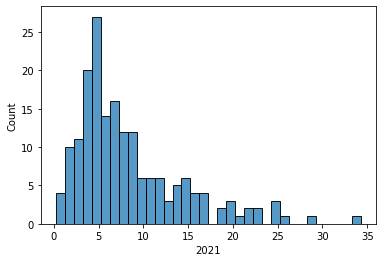

In [4]:
# Import the required visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
!pip3 install seaborn --upgrade

# Create a histogram of 2021 unemployment; show a full percent in each bin
sns.histplot(x='2021',data=unemployment, binwidth = 1)
plt.show()


In [5]:
# Update the data type of the 2019 column to a float
unemployment["2019"] = unemployment["2019"].astype('float')
# Print the dtypes to check your work
print(unemployment.dtypes)

country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object


In [6]:
# Define a Series describing whether each continent is outside of Oceania
not_oceania = ~unemployment['continent'].isin(['Oceania'])
# unemployment[unemployment.index !=not_oceania]
unemployment[not_oceania]


,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,VNM,Vietnam,Asia,1.11,1.00,1.03,1.32,1.26,1.85,1.85,1.87,1.16,2.04,2.39,2.17
178,YEM,"Yemen, Rep.",Asia,12.83,13.23,13.17,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57
179,ZAF,South Africa,Africa,24.68,24.64,24.73,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56
180,ZMB,Zambia,Africa,13.19,10.55,7.85,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03


In [7]:
# Define a Series describing whether each continent is outside of Oceania
not_oceania = ~unemployment["continent"].isin(["Oceania"])

# Print unemployment without records related to countries in Oceania
print(unemployment[not_oceania])


    country_code          country_name      continent   2010   2011   2012  \
0            AFG           Afghanistan           Asia  11.35  11.05  11.34   
1            AGO                Angola         Africa   9.43   7.36   7.35   
2            ALB               Albania         Europe  14.09  13.48  13.38   
3            ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4            ARG             Argentina  South America   7.71   7.18   7.22   
..           ...                   ...            ...    ...    ...    ...   
175          VNM               Vietnam           Asia   1.11   1.00   1.03   
178          YEM           Yemen, Rep.           Asia  12.83  13.23  13.17   
179          ZAF          South Africa         Africa  24.68  24.64  24.73   
180          ZMB                Zambia         Africa  13.19  10.55   7.85   
181          ZWE              Zimbabwe         Africa   5.21   5.37   5.15   

      2013   2014   2015   2016   2017   2018   2019   2020   2

In [8]:
unemployment.head()


,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


0.26 33.56


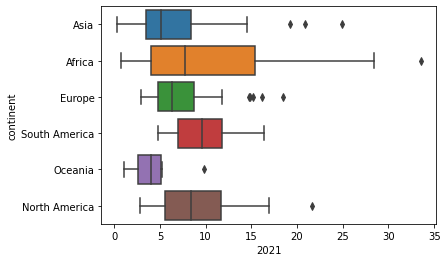

In [9]:
# Print the minimum and maximum unemployment rates during 2021
print(unemployment['2021'].min(), unemployment['2021'].max())

# Create a boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(x='2021', y = 'continent', data = unemployment)
plt.show()

In [10]:
# Print the mean and standard deviation of rates by year
print(unemployment.mean(numeric_only=True))
print(unemployment.std(numeric_only=True))

2010    8.409286
2011    8.315440
2012    8.317967
2013    8.344780
2014    8.179670
2015    8.058901
2016    7.925879
2017    7.668626
2018    7.426429
2019    7.243736
2020    8.420934
2021    8.390879
dtype: float64
2010    6.248887
2011    6.266795
2012    6.367270
2013    6.416041
2014    6.284241
2015    6.161170
2016    6.045439
2017    5.902152
2018    5.818915
2019    5.696573
2020    6.040915
2021    6.067192
dtype: float64


In [11]:
# Print yearly mean and standard deviation grouped by continent
print(unemployment.groupby('continent').mean(numeric_only=True))
print(unemployment.groupby('continent').std(numeric_only=True))

                    2010       2011       2012       2013       2014  \
continent                                                              
Africa          9.343585   9.369245   9.240755   9.132453   9.121321   
Asia            6.240638   5.942128   5.835319   5.852128   5.853191   
Europe         11.008205  10.947949  11.325641  11.466667  10.971282   
North America   8.663333   8.563333   8.448889   8.840556   8.512222   
Oceania         3.622500   3.647500   4.103750   3.980000   3.976250   
South America   6.870833   6.518333   6.410833   6.335000   6.347500   

                    2015      2016      2017      2018      2019       2020  \
continent                                                                     
Africa          9.222075  9.277547  9.284528  9.237925  9.264340  10.307736   
Asia            5.967447  6.094894  6.171277  6.090213  5.949149   7.012340   
Europe         10.301282  9.394615  8.359744  7.427436  6.764359   7.470513   
North America   8.098889  7.

In [12]:
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021 = ('2021','mean'),
    # Create the std_rate_2021 column
    std_rate_2021 = ('2021','std') 
)
print(continent_summary)

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


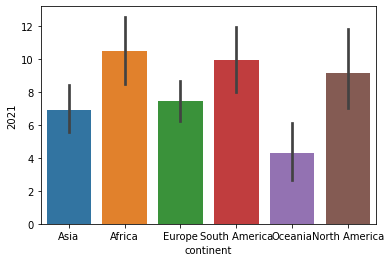

In [13]:
# Create a bar plot of continents and their average unemployment
sns.barplot(x='continent', y = '2021', data=unemployment)
plt.show()

In [14]:
# Count the number of missing values in each column
print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


In [15]:
# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


In [16]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


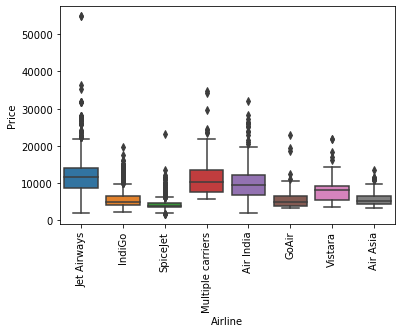

In [17]:
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

# Create a box plot of Price by Airline
sns.boxplot(data=planes, x='Airline', y='Price')
plt.xticks(rotation = 90)

plt.show()

In [18]:
planes.isna().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64

In [31]:
planes.drop(['Additional_Info'],axis=1, inplace = True)

In [46]:
airlines_median = planes.groupby('Airline')['Price'].median().to_dict()
# map the data 
planes['Price']=planes['Price'].fillna(planes['Airline'].map(airlines_median))
planes.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64